In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import glob
import os 

In [2]:
npy_files = os.walk('/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_lfq/eval/joints/',)
npy_files= sorted(npy_files)
print(npy_files)

[('/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_lfq/eval/joints/', [], ['2424.npy', '2593.npy', '99.npy', '1036.npy', '1914.npy', '2038.npy', '2234.npy', '3638.npy', '2890.npy', '1673.npy', '2265.npy', '3479.npy', '1493.npy', '2485.npy', '1189.npy', '4038.npy', '789.npy', '27.npy', '3013.npy', '1165.npy', '2399.npy', '2420.npy', '519.npy', '1549.npy', '2944.npy', '1466.npy', '137.npy', '3767.npy', '4053.npy', '3545.npy', '263.npy', '2373.npy', '3845.npy', '848.npy', '1486.npy', '3414.npy', '967.npy', '1095.npy', '2132.npy', '1974.npy', '625.npy', '2150.npy', '1688.npy', '1292.npy', '3731.npy', '3981.npy', '3382.npy', '3418.npy', '2673.npy', '994.npy', '1510.npy', '3520.npy', '3576.npy', '3555.npy', '887.npy', '3764.npy', '713.npy', '202.npy', '1655.npy', '1766.npy', '3232.npy', '1920.npy', '1230.npy', '3613.npy', '538.npy', '4049.npy', '2568.npy', '1667.npy', '3197.npy', '2522.npy', '1644.npy', '1083.npy', '3904.npy', '2306.npy', '1274.npy', '235.npy', '1279.npy', '182

In [5]:
trial = np.load('/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_lfq/eval/joints/0.npy')
print(trial.shape)

(4, 22, 3)


In [3]:
npy_path = '/home/dipcik/PycharmPhd/motion-vqvae/checkpoints/t2m/residual_lfq/eval/joints/'
flattened_motions = []
for i in range(4096):
    npy_files = npy_path + str(i) + '.npy'

    data = np.load(npy_files)
  
    data = data.flatten()
    flattened_motions.append(data)

In [4]:
data = np.array(flattened_motions)
print(data.shape)

(4096, 264)


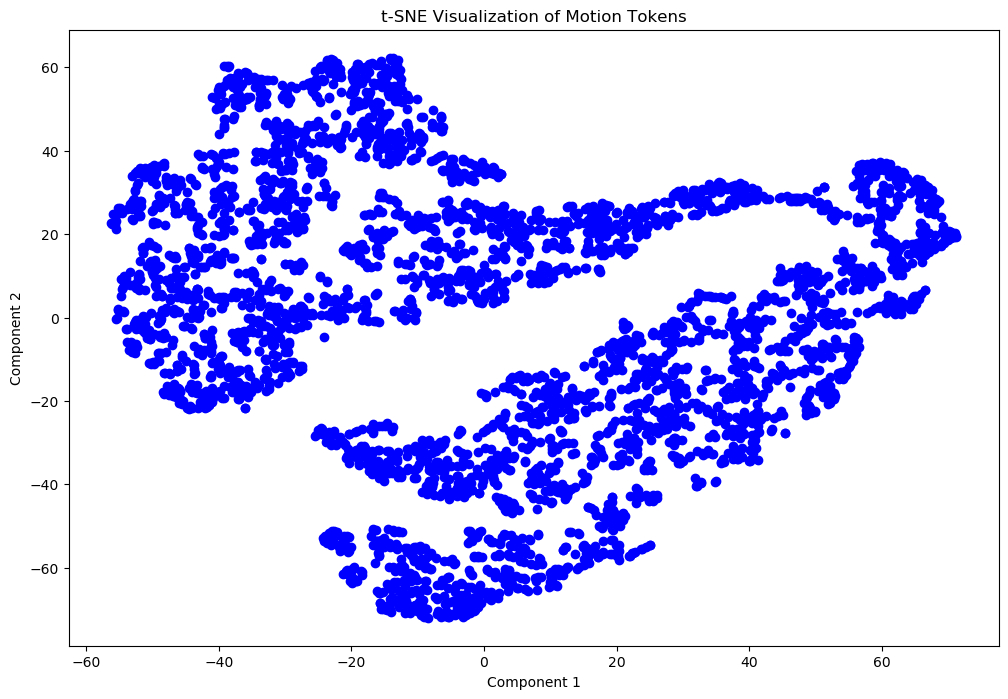

In [6]:

# Suppose `motions` is a list of sub-motions, each of shape (4, 22, 3)

# Convert to a 2D NumPy array where each row is a flattened sub-motion
data = np.array(flattened_motions)

# Create a KMeans object with 512 clusters
kmeans = KMeans(n_clusters=4096, random_state=0)

# Fit the model
kmeans.fit(data)

# Get the centroids, which represent each token
centroids = kmeans.cluster_centers_

# Apply t-SNE to project the centroids into 2D space
tsne = TSNE(n_components=2, random_state=0)
centroids_2d = tsne.fit_transform(centroids)

# Plot the 2D projections
plt.figure(figsize=(12, 8))
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='blue', marker='o')
plt.title("t-SNE Visualization of Motion Tokens")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


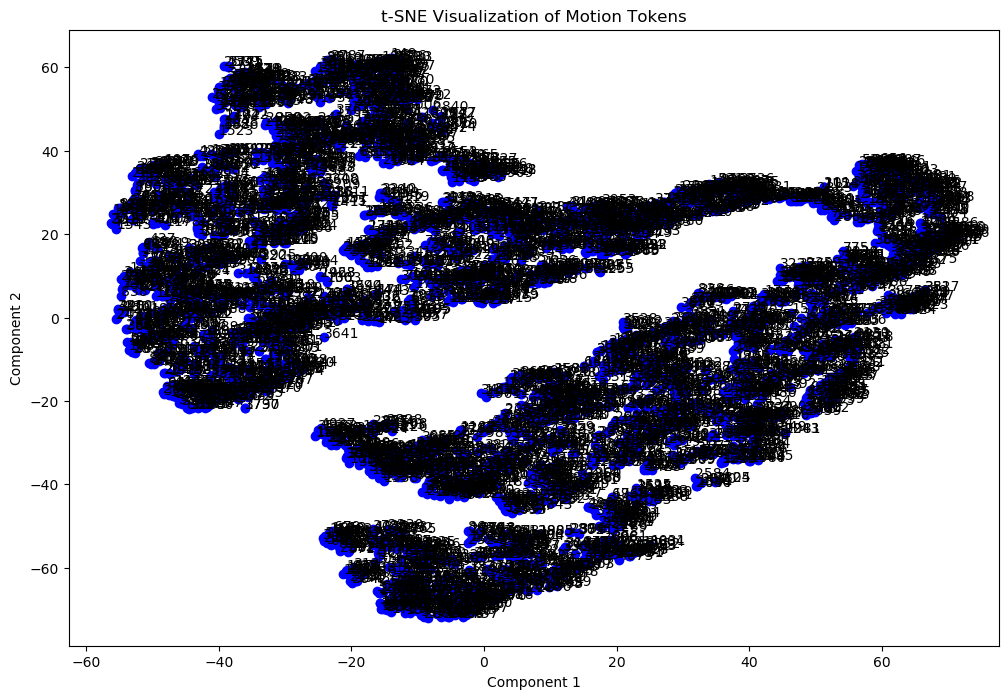

In [7]:
# Assuming labels is a list of labels for each centroid
labels = kmeans.labels_

plt.figure(figsize=(12, 8))
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='blue', marker='o')

# Add labels to the plot
for i, label in enumerate(labels):
    plt.text(centroids_2d[i, 0], centroids_2d[i, 1], str(label))

plt.title("t-SNE Visualization of Motion Tokens")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()